In [1]:
# Choose a user:
USER = 'Danny'

# Check input user...
USER_LIST = ['Eole', 'Danny', 'Cindy']
assert (USER in USER_LIST), \
"`USER` value is invalid: {user_val} \nChoose value in: {user_list}".format(user_val = USER, user_list = USER_LIST)

# Define file path
save_load_path = None

if USER == 'Eole':
    save_load_path = '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Danny':
    save_load_path = '/Users/Dannyhsiao/Dropbox/MA755 Public (1)/pynotes/Danny-Eole-Yuchen/Pickles'
elif USER == 'Cindy':
    save_load_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
        
# PATHS...
# '/Users/Dannyhsiao/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/home/eolus/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
# '/Users/YuchenZhou/Dropbox/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'

In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
# Choose data source here:
DATA = 'song'

DATA_LIST = ['lyrics', 'song', 'hybrid']
input_file = None

assert (DATA in DATA_LIST), \
"`DATA` value is invalid: {data_val} \nChoose value in: {data_list}".format(data_val = DATA, data_list = DATA_LIST)

if DATA == 'lyrics':
    input_file = 'mss_lyrics_pvt_df.pkl'
elif DATA == 'song':
    input_file = 'mss_song_df.pkl' # Confirm input file name /!\
elif DATA == 'hybrid':
    input_file = 'mss_hybrid_df.pkl' # Confirm input file name /!\
else:
    exception

In [10]:
mss_df = pd.read_pickle(save_load_path+'/mss_df.pkl')
mss_df.head()

mss_df.shape


(10000, 117)

In [51]:
mss_df_d=mss_df.drop(['artist_id','artist_latitude','artist_location','artist_longitude','artist_name','song_id',
                      'track','track_id','title','release'], axis=1)

In [18]:
col_list = list(mss_df_d.columns.values)
col_list = pd.DataFrame(col_list)
col_list

,0
0,artist_familiarity
1,artist_hotttnesss
2,bc_0
3,bc_1
4,bc_2
5,bc_3
6,bc_4
7,bc_5
8,bc_6
9,bc_7


In [63]:
# drop chategorical variables (binary): mode, k_0 - k_10, ts_0 - ts_7

mss_df_dchar_t=mss_df_d.drop(['mode'],axis=1)
mss_df_dchar_t=mss_df_dchar_t.drop(mss_df_dchar_t.columns[88:],axis=1)

In [64]:
mss_df_dchar_t.shape

(10000, 88)

In [65]:
mss_df_dchar_t.describe()

,artist_familiarity,artist_hotttnesss,bc_0,bc_1,bc_2,bc_3,bc_4,bc_5,bc_6,bc_7,...,st_33,st_34,st_35,st_4,st_5,st_6,st_7,st_8,st_9,tempo
count,9996.000000,10000.000000,9970.000000,9970.000000,9966.000000,9964.000000,9959.000000,9953.000000,9950.000000,9946.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.565456,0.385552,0.239461,0.235951,0.226657,0.226818,0.220867,0.222040,0.219510,0.211825,...,6.446185,1.730439,3.39383,48.384390,-6.957693,22.606862,-3.749754,-24.926614,19.747926,122.915449
std,0.160161,0.143647,0.275182,0.234840,0.228602,0.229048,0.228798,0.226301,0.226135,0.221965,...,22.997694,23.325525,22.56437,25.249283,81.555819,22.297102,34.815185,15.346848,31.569429,35.184412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-102.370000,-158.365000,-136.27300,-120.677000,-122.362000,-116.700000,-191.409000,-167.873000,-68.548000,0.000000
25%,0.467611,0.325266,0.035000,0.054000,0.050000,0.050000,0.046000,0.049000,0.047000,0.044000,...,-6.663750,-9.532500,-9.34100,47.520750,-50.067000,14.833000,0.425000,-27.228000,0.973000,96.965750
50%,0.563666,0.380742,0.121000,0.148500,0.141000,0.143000,0.134000,0.136000,0.133000,0.128000,...,4.696500,1.776500,3.91750,57.491000,-50.067000,14.833000,5.359000,-27.228000,0.973000,120.161000
75%,0.668020,0.453858,0.352000,0.357000,0.343750,0.337000,0.332000,0.330000,0.329000,0.313750,...,17.824250,13.250250,16.82000,57.491000,9.881500,24.570250,5.359000,-26.830000,31.782500,144.013250
max,1.000000,1.082503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,137.037000,148.194000,123.94500,225.863000,343.198000,137.807000,189.329000,75.450000,164.419000,262.828000


In [67]:
# Normalization before PCA
mss_df_dcharnorm = (mss_df_dchar_t - mss_df_dchar_t.mean()) / (mss_df_dchar_t.max() - mss_df_dchar_t.min())

In [70]:
# Nan checking
pd.isnull(mss_df_dcharnorm).sum()

artist_familiarity       4
artist_hotttnesss        0
bc_0                    30
bc_1                    30
bc_2                    34
bc_3                    36
bc_4                    41
bc_5                    47
bc_6                    50
bc_7                    54
bc_8                    62
bc_9                    69
duration                 0
loudness                 0
song_hotttnesss       4352
sp_0                     0
sp_1                     0
sp_10                    0
sp_11                    0
sp_12                    0
sp_13                    0
sp_14                    0
sp_15                    0
sp_16                    0
sp_17                    0
sp_18                    0
sp_19                    0
sp_2                     0
sp_20                    0
sp_21                    0
                      ... 
st_15                    0
st_16                    0
st_17                    0
st_18                    0
st_19                    0
st_2                     0
s

In [71]:
# replace Nan with column mean
mss_df_dcharnorm=mss_df_dcharnorm.fillna(mss_df_dcharnorm.mean())

In [72]:
# Double check: no Nan exist
pd.isnull(mss_df_dcharnorm).sum()

artist_familiarity    0
artist_hotttnesss     0
bc_0                  0
bc_1                  0
bc_2                  0
bc_3                  0
bc_4                  0
bc_5                  0
bc_6                  0
bc_7                  0
bc_8                  0
bc_9                  0
duration              0
loudness              0
song_hotttnesss       0
sp_0                  0
sp_1                  0
sp_10                 0
sp_11                 0
sp_12                 0
sp_13                 0
sp_14                 0
sp_15                 0
sp_16                 0
sp_17                 0
sp_18                 0
sp_19                 0
sp_2                  0
sp_20                 0
sp_21                 0
                     ..
st_15                 0
st_16                 0
st_17                 0
st_18                 0
st_19                 0
st_2                  0
st_20                 0
st_21                 0
st_22                 0
st_23                 0
st_24           

In [73]:
#PCA function

import os
import itertools as it
import matplotlib.pyplot as plt
import math
import h5py 
import os
import itertools
import re
from sklearn.preprocessing import scale
%matplotlib inline

def pcf(matrix):
    #scale the data
    A_s = scale(matrix, with_mean=True,with_std=True,axis=0)
    #covariance matrix
    A_c = np.cov(A_s.T)
    #Get the eign values and eign vectors
    eig_val_cov, eig_vec_cov = np.linalg.eig(A_c)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i])
             for i in range(len(eig_val_cov))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort
    eig_pairs.reverse
    return(eig_pairs)

pc = pcf(mss_df_dcharnorm)

print(pc[0])

(9.5809909817172922, array([-0.01465671, -0.00329052,  0.00237106, -0.00481509, -0.00909532,
       -0.00924985, -0.00997218, -0.00847131, -0.00964878, -0.00494841,
       -0.0088335 , -0.00201697, -0.00642261, -0.01170536, -0.01119865,
        0.20550449,  0.22343493,  0.22750922,  0.19862308,  0.01092269,
        0.01174376,  0.01702621,  0.02488022,  0.01914721,  0.02150643,
        0.02047169,  0.0200914 ,  0.23397252,  0.01579771,  0.01754398,
        0.01861596,  0.01051411,  0.00177117,  0.00616568,  0.00927693,
        0.01303867,  0.01405957,  0.01627591,  0.25370812,  0.01193102,
        0.00532742,  0.00985386,  0.01398708,  0.00984724,  0.0015124 ,
        0.24020118,  0.25024588,  0.24833718,  0.22194023,  0.24105926,
        0.23414297, -0.20519745,  0.20791179, -0.10454833, -0.05097298,
       -0.07253155,  0.03960576,  0.02395258, -0.09252226,  0.0662525 ,
        0.13854011,  0.09692336, -0.02317555, -0.0597057 , -0.0841977 ,
        0.17529156,  0.06675447, -0.023393 

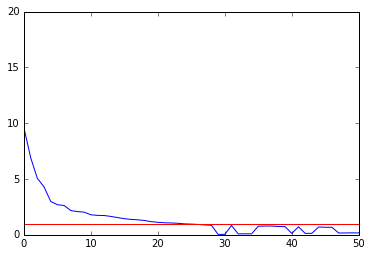

In [75]:
def extract_eign(pair):
    eig_val=[0]*len(pair)
    index=0
    for i in pair:
        eig_val[index]=i[0]
        index+=1
    return(eig_val)

pceign=extract_eign(pc)
plt.plot(pceign)
plt.axis([0,50,0,20])
plt.axhline(y=1,color='r')

In [81]:
# Reduce 62 variables (half) and still be able to explain 70% of the original data. (PC26's eigen value is higher than 1)

def var_explained(eig,i):
    cum_per=0
    per_var=0
    for e_val in (eig[0:i]):
        per_var = round((e_val / len(eig)),3)
        cum_per+=per_var
    return(cum_per)

var_explained(pceign,26)

0.70400000000000029

In [82]:
num_pc = 26

len_vector = mss_df_dcharnorm.shape[1]

w_matrix = np.empty([len_vector,1], dtype = float)

In [83]:
for i in range(num_pc):
    pc_col = pc[i][1].reshape(len_vector,1)
    w_matrix = np.hstack((w_matrix, pc_col))
    
w_matrix2 = np.delete(w_matrix,0,1).astype(float)

In [84]:
print(w_matrix2.shape)
print('****************************************************')
print(w_matrix2)

(88, 26)
****************************************************
[[-0.01465671 -0.07490275 -0.01500935 ..., -0.07965586  0.04477816
  -0.01249341]
 [-0.00329052 -0.06102913 -0.01445138 ..., -0.10924418  0.05287875
  -0.02152389]
 [ 0.00237106  0.08790073  0.29784322 ..., -0.0759867  -0.02873784
  -0.02113991]
 ..., 
 [-0.03506884 -0.10059808  0.01263428 ..., -0.04661255  0.02228728
   0.00643478]
 [-0.21718731 -0.09681206 -0.00948749 ...,  0.02146382  0.01541502
   0.02064343]
 [-0.00563483 -0.05307182 -0.06762898 ...,  0.47963391 -0.49044217
   0.43690357]]


In [86]:
# 10,000 rows (track_id level) with PC1-PC26
pc_scores = mss_df_dcharnorm.dot(w_matrix2)
pc_scores.shape

(10000, 26)

In [87]:
# Checkpoint - pickle pickle pickle!
np.save(save_load_path+'/pc_scores_acoustic_dchar', pc_scores)